# Katz centrality

In [36]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
import math
import scipy.stats as stats
import pandas as pd

## Algorithm

In [37]:
def katz(graph, max_num_of_steps, tolerance, alpha, beta):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(graph)
    # first guess for vector r is first column of A
    r = A[:, 0]  
    diff = 1000
    k = 0
    vector = np.ones((A.shape[1], 1))
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r) + beta * vector, r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return r

### Small example

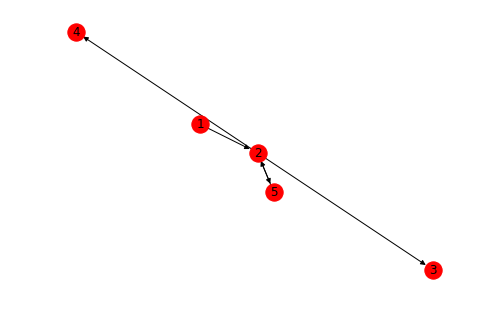

In [38]:
T = nx.DiGraph()   # or DiGraph, etc
T.add_edges_from(((1, 2), (2, 3), (2, 4), (2, 5), (5, 2)))
nx.draw(T, with_labels=True)
plt.show()

In [39]:
test = katz(T, 100, 0.1, 0.2, 1)
test

process finished after 4 iterations
time consumption: 0.001859128999967652 seconds


matrix([[1.328],
        [1.664],
        [1.   ],
        [1.   ],
        [1.328]])

In [40]:
def rank(array):
    '''Returns vector with ranked values of array,
    where 0 is the minimum value of array'''
    temp = array[:, 0].argsort(axis=0)
    ranks = temp[:, 0].argsort(axis=0)
    return ranks

In [41]:
rank(test)

matrix([[2],
        [4],
        [0],
        [1],
        [3]], dtype=int64)

### Katz centrality on networks

In [43]:
#citation:@misc{snapnets,
#  author       = {Jure Leskovec and Andrej Krevl},
#  title        = {{SNAP Datasets}: {Stanford} Large Network Dataset Collection},
#  howpublished = {\url{http://snap.stanford.edu/data}},
#  month        = jun,
#  year         = 2014
#}
G_fb = nx.read_edgelist('facebook_combined.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'facebook_combined.txt'